In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/Dogecoin%20Data/DOGE-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [3]:
print(f"Shape of Dataframe {df.shape}")

Shape of Dataframe (2501, 7)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2501 non-null   object 
 1   Open       2497 non-null   float64
 2   High       2497 non-null   float64
 3   Low        2497 non-null   float64
 4   Close      2497 non-null   float64
 5   Adj Close  2497 non-null   float64
 6   Volume     2497 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2.497000e+03
mean,0.016319,0.017798,0.014860,0.016396,0.016396,4.853047e+08
std,0.067026,0.074085,0.059911,0.067189,0.067189,2.943473e+09
min,0.000087,0.000089,0.000085,0.000087,0.000087,1.669500e+04
25%,0.000226,0.000231,0.000222,0.000226,0.000226,2.425380e+05
50%,0.002097,0.002151,0.002056,0.002101,0.002101,1.058300e+07
75%,0.003115,0.003209,0.003009,0.003122,0.003122,6.176750e+07
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [6]:
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

<AxesSubplot:>

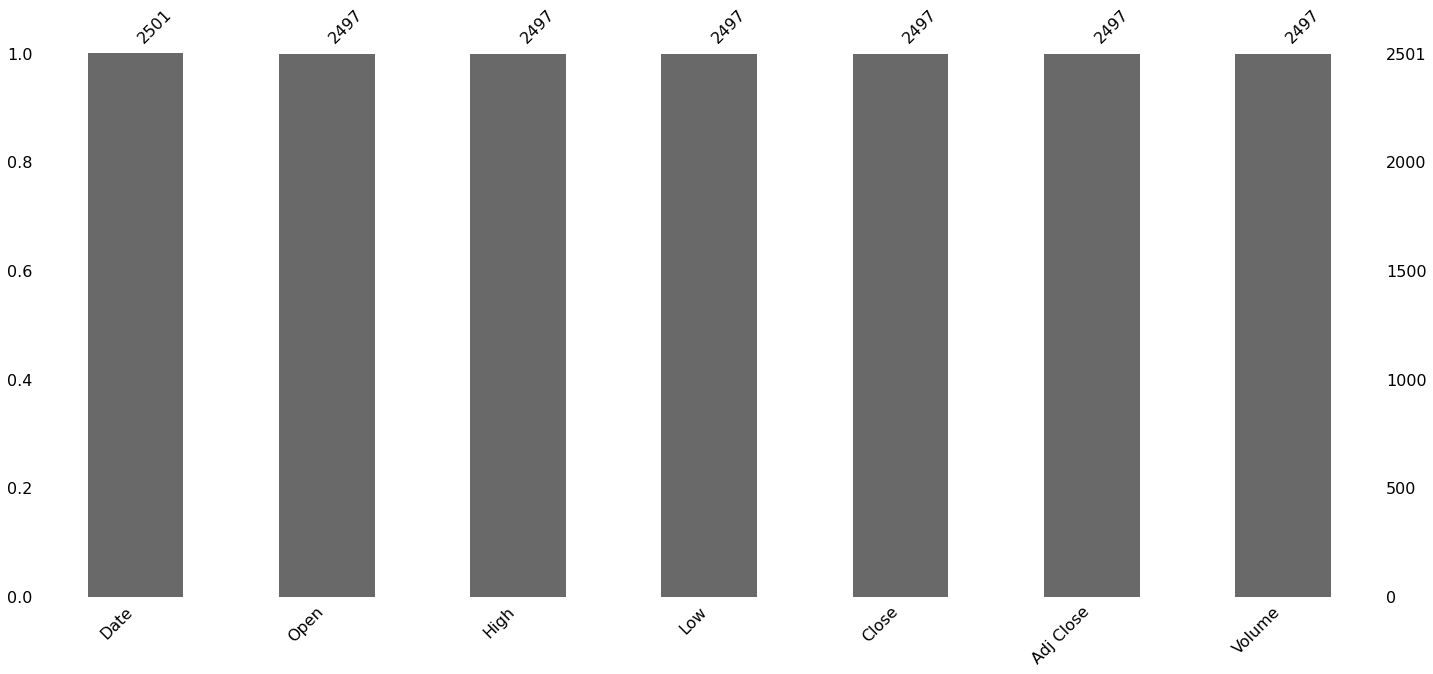

In [7]:
msno.bar(df)

In [8]:
df=df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df=df.drop(["Date"],axis=1)
df.shape

(2497, 6)

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

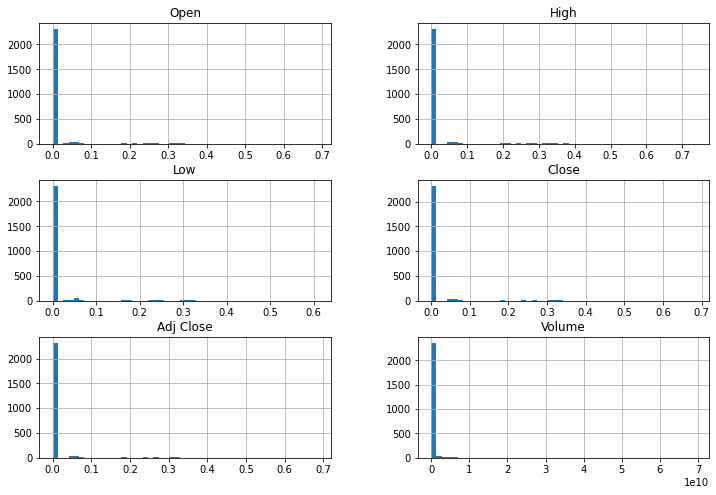

In [10]:
df.hist(bins=50,figsize=(12,8))

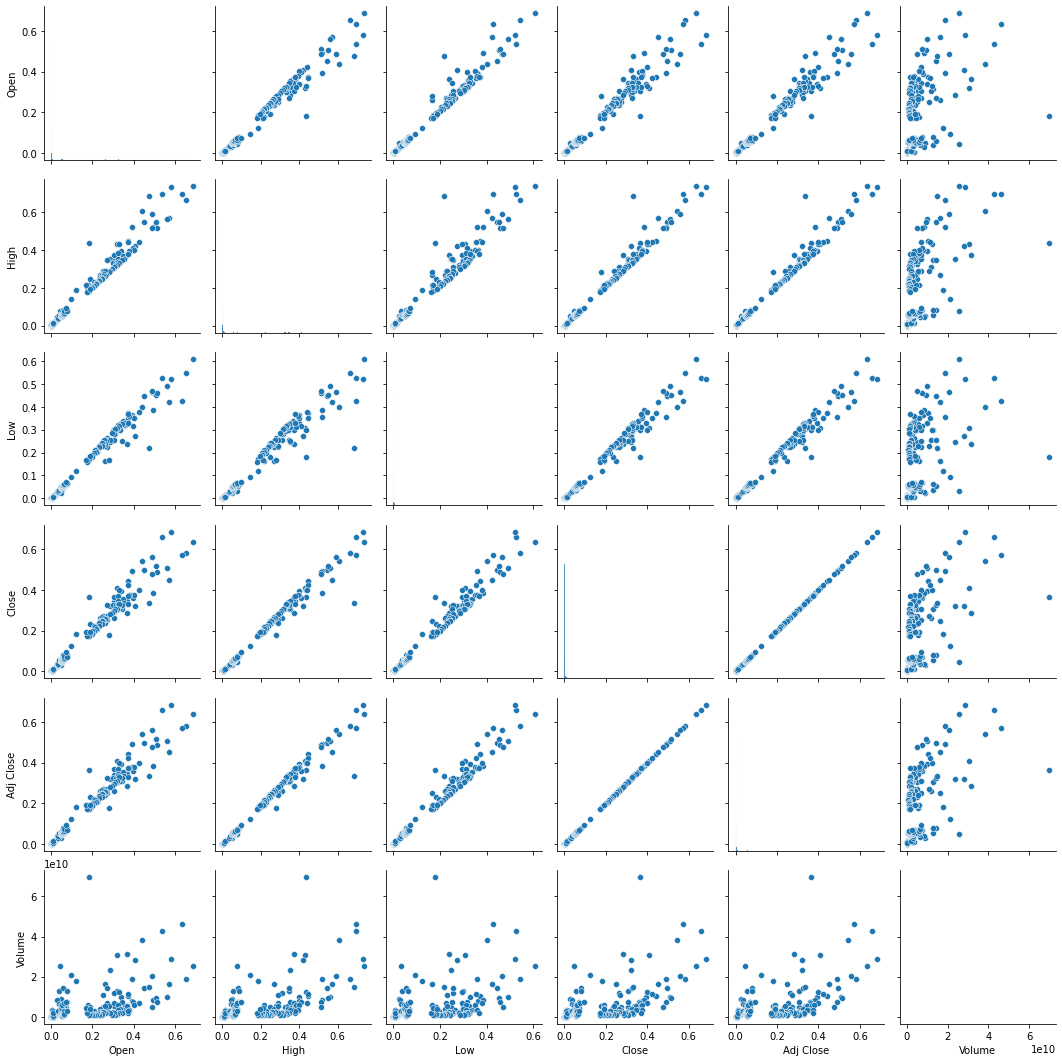

In [11]:
sns.pairplot(data=df)

<AxesSubplot:>

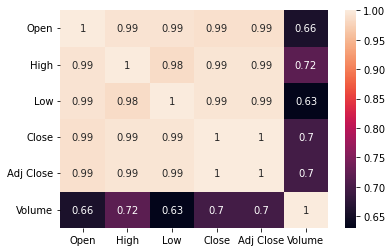

In [12]:
corr= df.corr()
sns.heatmap(corr,annot=True)

In [13]:
scaler = StandardScaler()
scaler.fit(df.drop(['Volume'],axis=1))

StandardScaler()

In [14]:
X=np.array(scaler.transform(df.drop(['Volume'],axis=1)))
y= np.array(df['Volume'])

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(f'shape of X_train : {X_train.shape}\nshape of X_test : {X_test.shape}\nshape of y_train : {y_train.shape}\nshape of y_test : {y_test.shape}')

shape of X_train : (1747, 5)
shape of X_test : (750, 5)
shape of y_train : (1747,)
shape of y_test : (750,)


In [16]:
modelLIN= LinearRegression()
modelLIN.fit(X_train,y_train)
Y_predLin=modelLIN.predict(X_test)
print("MSE : ",mean_absolute_error(y_test,Y_predLin))
print("MAE : ",mean_squared_error(y_test,Y_predLin))
print("R2_Score: ",r2_score(y_test,Y_predLin))

MSE :  314331963.2812019
MAE :  2.1530205123053245e+18
R2_Score:  0.7042533212073496


In [17]:
pd.DataFrame({"Real Prediction":y_test,"Model Prediction":Y_predLin})

,Real Prediction,Model Prediction
0,3.021320e+07,1.877341e+08
1,1.756600e+05,5.878720e+07
2,3.560170e+05,5.954506e+07
3,3.707799e+07,7.421465e+07
4,3.103724e+07,1.058811e+08
...,...,...
745,1.752650e+05,5.985915e+07
746,2.189610e+06,6.592103e+07
747,4.119800e+04,5.890032e+07
748,1.997720e+05,6.054941e+07


In [18]:
modelTree = DecisionTreeRegressor()
modelTree.fit(X_train,y_train)
Y_predTree= modelTree.predict(X_test)
print("MSE : ",mean_absolute_error(y_test, Y_predTree))
print("MAE : ",mean_squared_error(y_test,Y_predTree))
print("R2_Score: ",r2_score(y_test,Y_predTree))

MSE :  275896065.98
MAE :  2.8251334434830664e+18
R2_Score:  0.6119294599002533


In [19]:
pd.DataFrame({"Real Prediction":y_test,"Model Prediction":Y_predTree})

,Real Prediction,Model Prediction
0,3.021320e+07,6.812848e+07
1,1.756600e+05,1.619180e+05
2,3.560170e+05,3.141540e+05
3,3.707799e+07,4.827250e+06
4,3.103724e+07,6.982284e+07
...,...,...
745,1.752650e+05,3.362550e+05
746,2.189610e+06,3.146680e+06
747,4.119800e+04,6.356300e+04
748,1.997720e+05,5.123420e+05


In [20]:
modelEns = RandomForestRegressor()
modelEns.fit(X_train,y_train)
Y_predEns = modelEns.predict(X_test)
print("MSE : ",mean_absolute_error(y_test, Y_predEns))
print("MAE : ",mean_squared_error(y_test,Y_predEns))
print("R2_Score: ",r2_score(y_test,Y_predEns))

MSE :  222714801.13793108
MAE :  1.5030016671433203e+18
R2_Score:  0.7935422590091809


In [21]:
pd.DataFrame({"Real Prediction":y_test,"Model Prediction":Y_predEns})

,Real Prediction,Model Prediction
0,3.021320e+07,7.719888e+07
1,1.756600e+05,1.494222e+05
2,3.560170e+05,1.905609e+05
3,3.707799e+07,1.556028e+07
4,3.103724e+07,5.433661e+07
...,...,...
745,1.752650e+05,2.401271e+05
746,2.189610e+06,2.963959e+06
747,4.119800e+04,5.080168e+04
748,1.997720e+05,2.866466e+05
